In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

df = pd.read_csv("data.csv", delimiter=";", decimal=",", usecols=["x", "y"]) 
x = df.x.values
y = df.y.values

xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

In [260]:
# найдем распределение x
kernel_x = gaussian_kde(x)

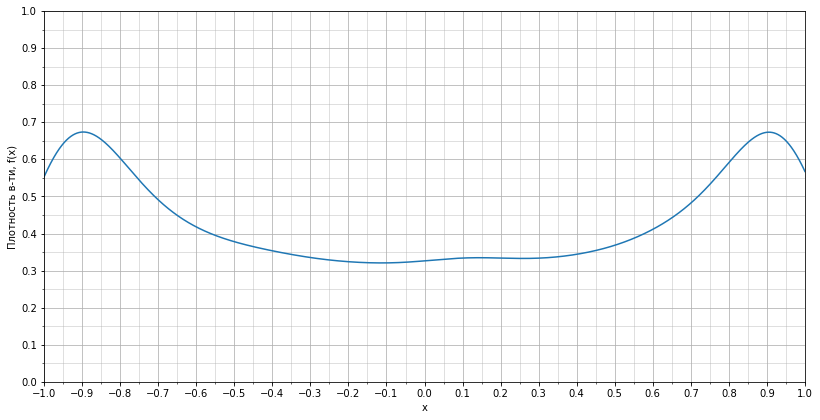

<Figure size 432x288 with 0 Axes>

In [261]:
fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot(2, 2, 1)

# настройка сетки
ax.set_xticks(np.linspace(xmin, xmax, num=21))
ax.set_xticks(np.linspace(xmin, xmax, num=41), minor=True)
ax.set_yticks(np.linspace(0, 1, num=11))
ax.set_yticks(np.linspace(0, 1, num=21), minor=True)
ax.grid(which='both')

# прозрачность сетки
ax.grid(which='minor', alpha=0.5)
ax.grid(which='major', alpha=0.75)

# лимиты осей
ax.set_xlim([-1, 1])
ax.set_ylim([0, 1])

# названия осей
ax.set_xlabel('x')
ax.set_ylabel('Плотность в-ти, f(x)')

x_eval = np.linspace(xmin, xmax, num=6000)
f_x = kernel_x(x_eval)
ax.plot(x_eval, f_x)

# заполнить область под графиком
# plt.fill_between(x_eval, kde(x_eval))
plt.show()

In [262]:
# площадь под графиком
np.trapz(f_x, x=x_eval, dx=0.01, axis=0)

0.8694188279057841

In [263]:
# найдем совместное распределение x{n} и x{n+1} 
kernel_multi = gaussian_kde(np.vstack([x, y]))

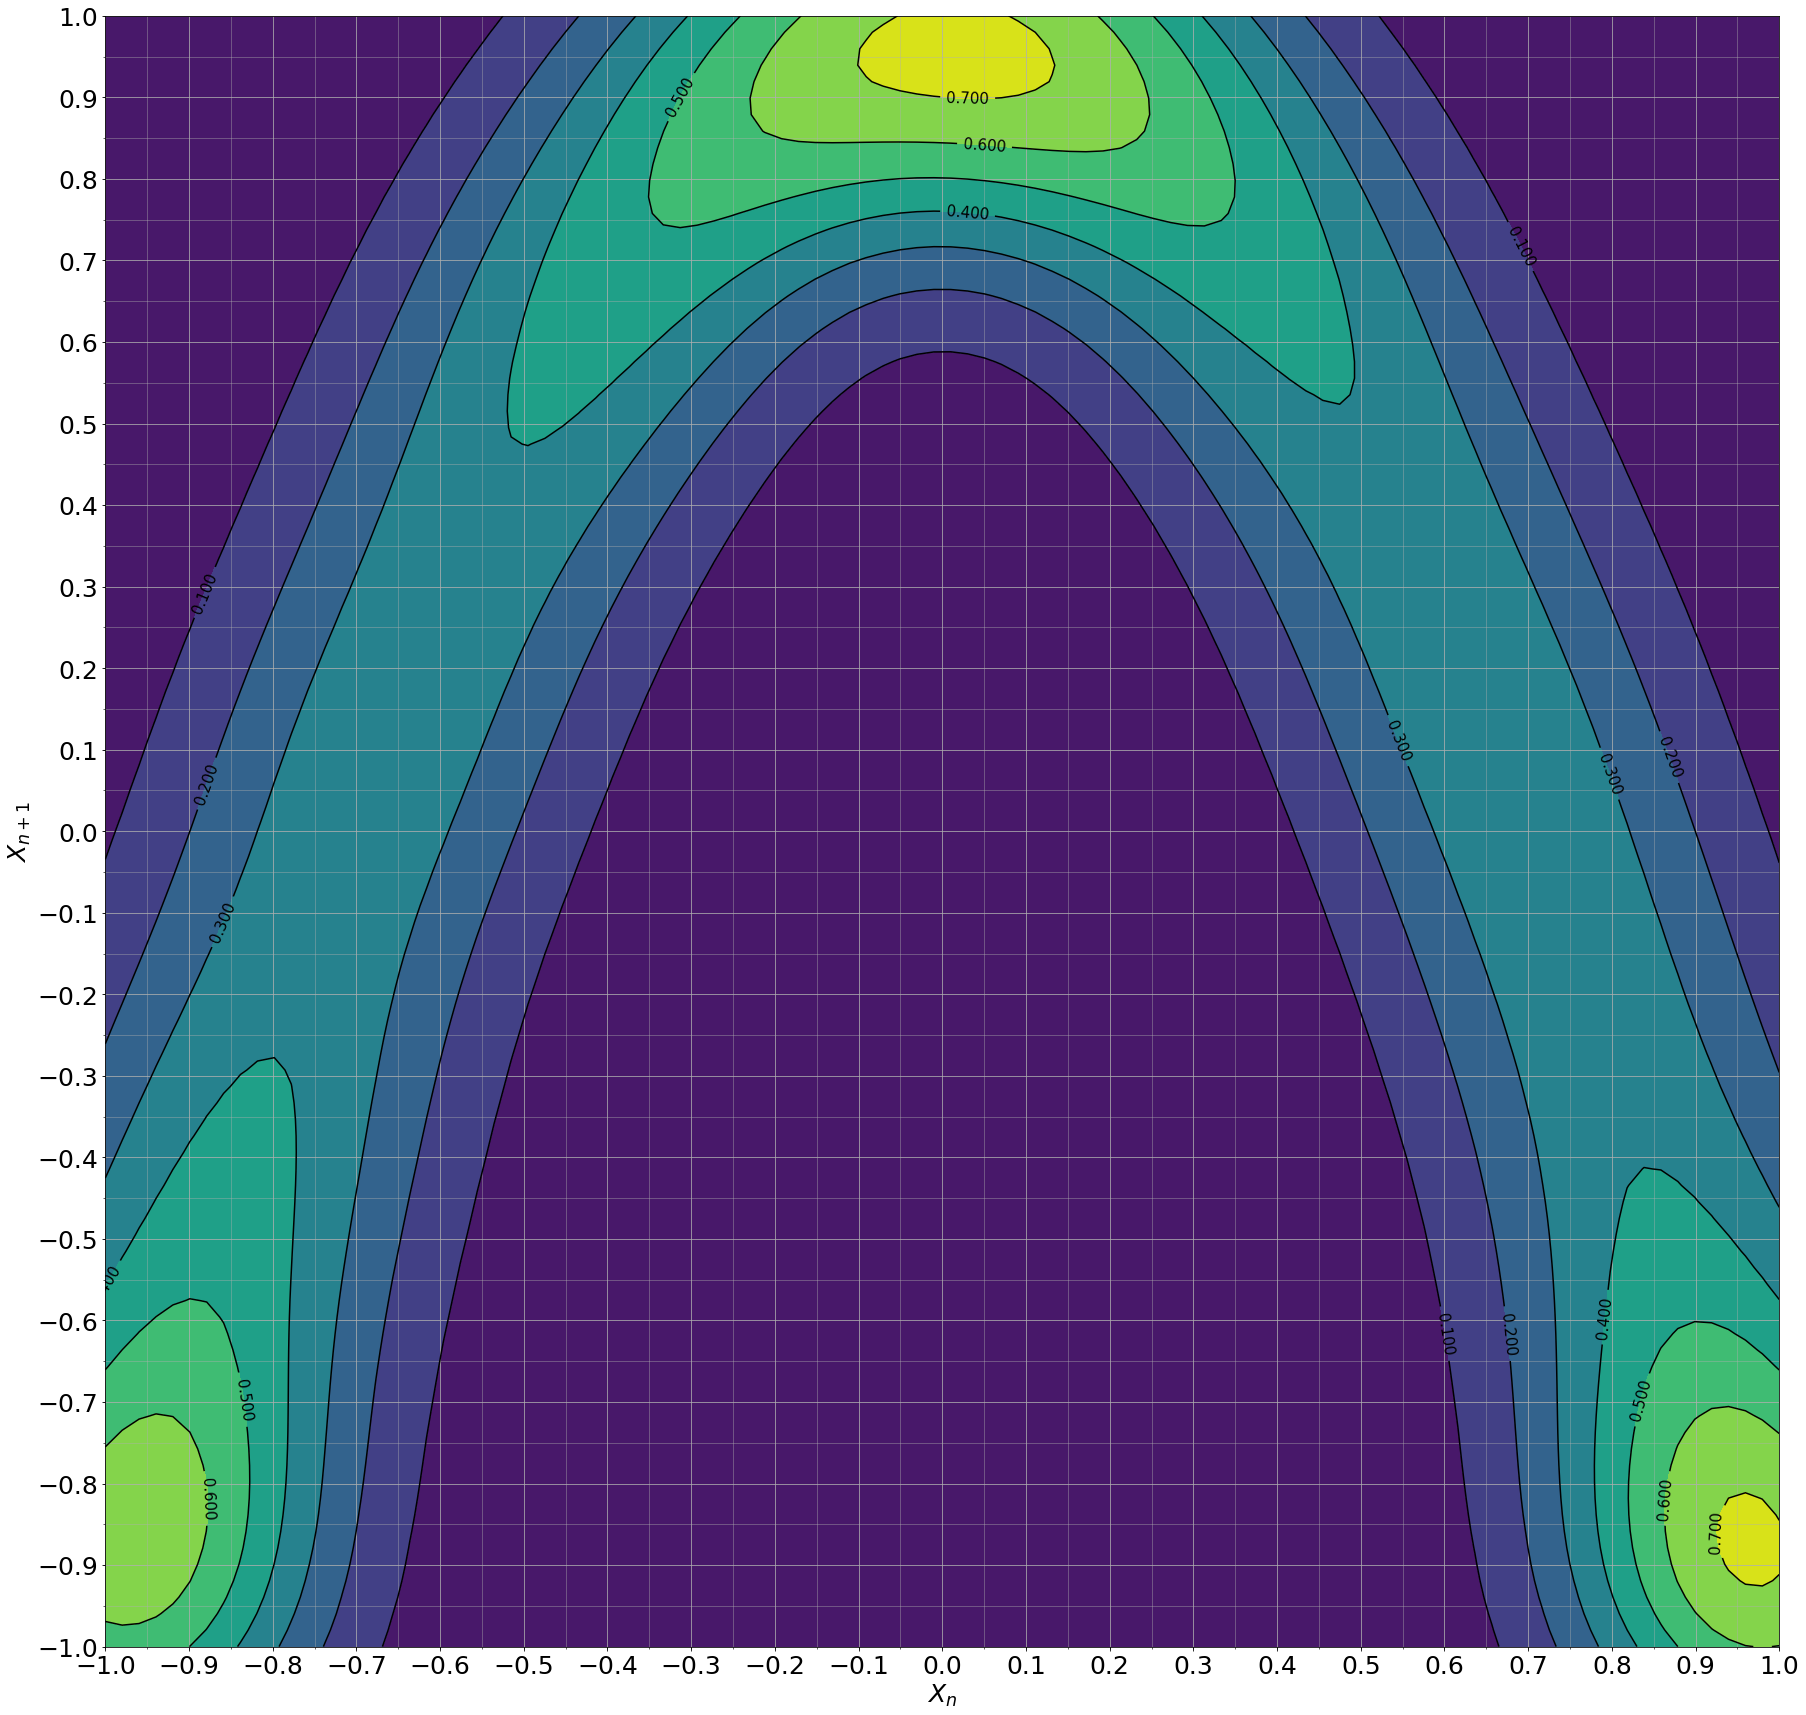

<Figure size 432x288 with 0 Axes>

In [264]:
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])

f = np.reshape(kernel_multi(positions).T, xx.shape)

fig = plt.figure(figsize=(30, 30))
ax = fig.gca()

ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)

# настройка сетки
ax.set_xticks(np.linspace(xmin, xmax, num=21))
ax.set_xticks(np.linspace(xmin, xmax, num=41), minor=True)
ax.set_yticks(np.linspace(xmin, xmax, num=21))
ax.set_yticks(np.linspace(xmin, xmax, num=41), minor=True)
ax.grid(which='both')

# прозрачность сетки
ax.grid(which='minor', alpha=0.5)
ax.grid(which='major', alpha=0.75)

# лимиты осей
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# названия осей
ax.set_xlabel('$X_n$', fontsize=25)
ax.set_ylabel('$X_{n+1}$', fontsize=25)

# контура
cfset = ax.contourf(xx, yy, f, cmap='viridis')
cset = ax.contour(xx, yy, f, colors='k')

# значения на контурах
ax.clabel(cset, inline=1, fontsize=15)

plt.show()

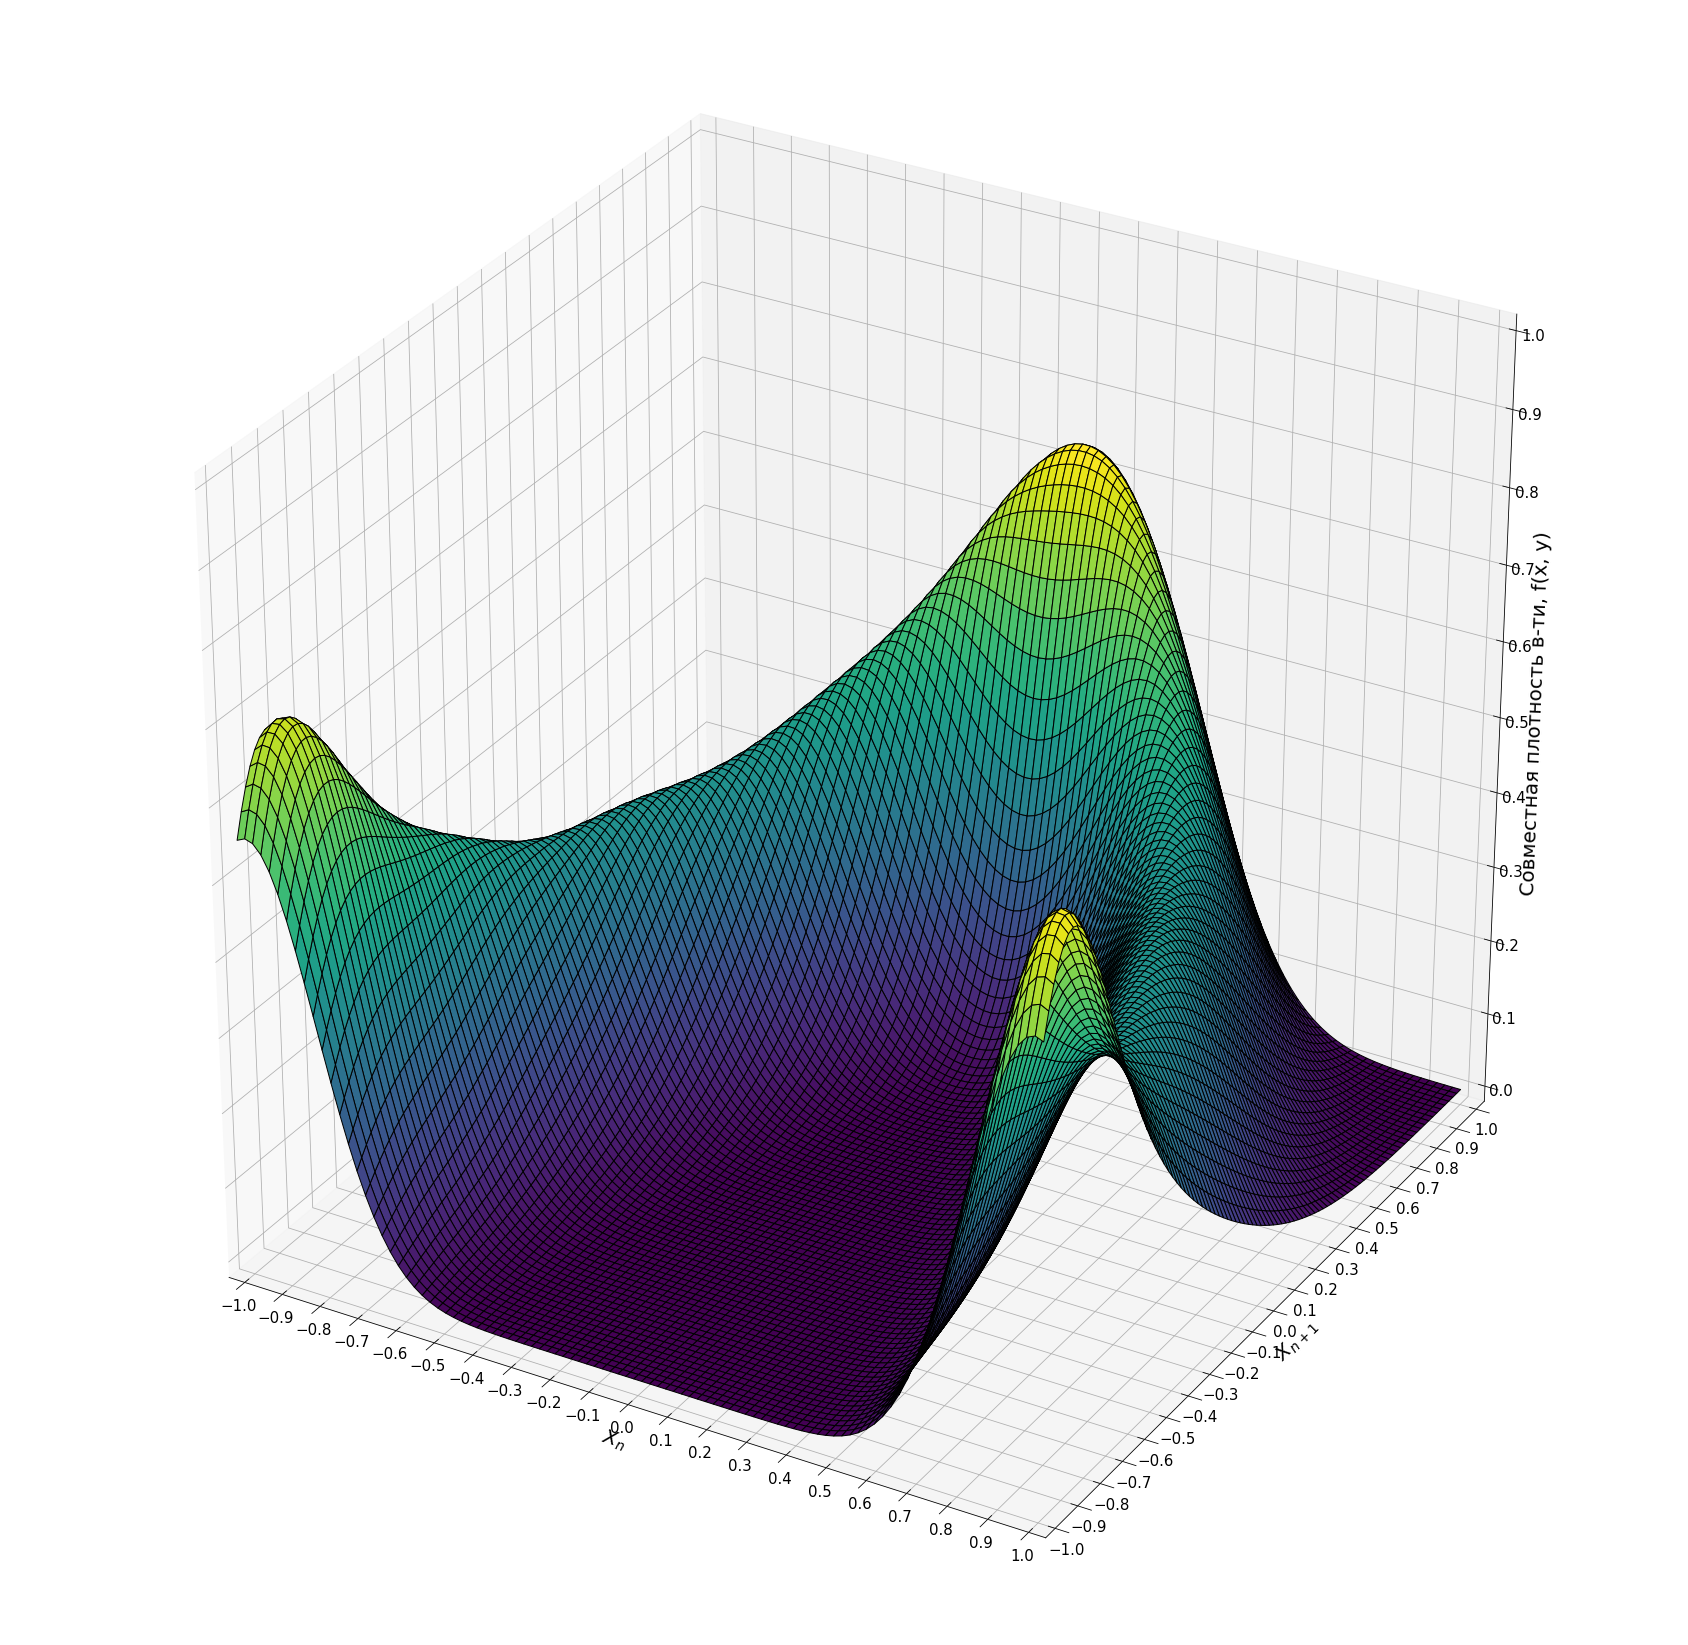

<Figure size 432x288 with 0 Axes>

In [266]:
# Построим трехмерный график для полноты картины
fig = plt.figure(figsize=(30, 30))
ax = plt.axes(projection='3d')

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='z', labelsize=15)

# настройка сетки
ax.set_xticks(np.linspace(xmin, xmax, num=21))
ax.set_yticks(np.linspace(xmin, xmax, num=21))
ax.set_zticks(np.linspace(0, 1, num=11))
ax.grid(which='both')

# лимиты осей
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_zlim(0, 1)

# названия осей
ax.set_xlabel('$X_n$', fontsize=20)
ax.set_ylabel('$X_{n+1}$', fontsize=20)
ax.set_zlabel('Совместная плотность в-ти, f(x, y)', fontsize=20)

#ax.contour3D(xx, yy, f, 150, cmap='binary')
ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='viridis', edgecolor='black')

plt.show()